In [1]:
#1st import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Using path load dataset.
path= "C:/Users/hride/OneDrive/Desktop/Active Projects/Customer Churn Prediction System/Customer_Churn_Dataset/Telco_Churn_Dataset.csv"
df = pd.read_csv(path)

In [15]:
#Some basic check before EDA
print("Dataset Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
#Make sure to add parameter to check missing values.
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
#Distribute the Target Variable 
print("\nChurn Value Counts:\n",df['Churn'].value_counts())


Churn Value Counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [23]:
#Here we have a catch for missing value when we see them in pandas if any items having no vlaue than it will not consider it as missing as "" is not the same as NaN in pandas.
#Pandas treats blank strings as valid entries, not as missing.

#to verify
print(df[df['TotalCharges'] ==' '])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [27]:
#As we can see the above dataset where the TotalCharges seems to be blank hence we have fix it to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [29]:
# Check how many rows have blank TotalCharges
print((df['TotalCharges'] == ' ').sum())

0


In [31]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check missing values again
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [35]:
#Perfect so now we can drop the missing ones and move further.
df.dropna(subset=['TotalCharges'], inplace = True)
#Let's check the same as well.
print("New Shape after dropping:", df.shape)


New Shape after dropping: (7032, 21)


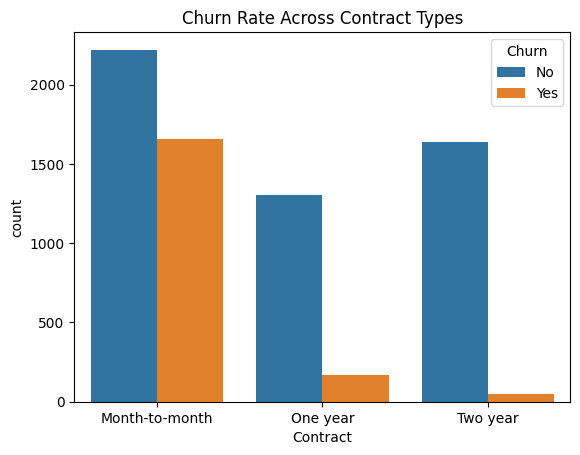

In [37]:
#Let's now check the affecting features 
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate Across Contract Types')
plt.show()


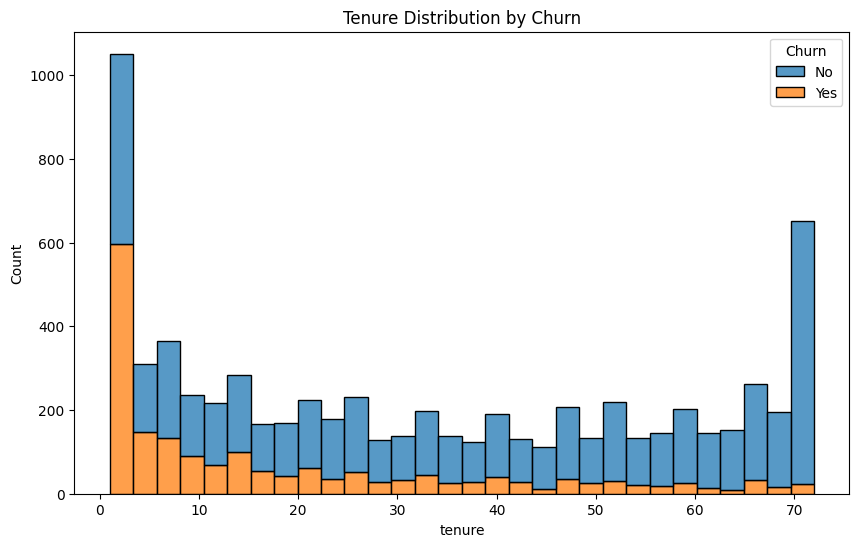

In [41]:
#Let's check the Tenure vs Churn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'tenure', hue= 'Churn', multiple = "stack", bins = 30)
plt.title("Tenure Distribution by Churn")
plt.show()

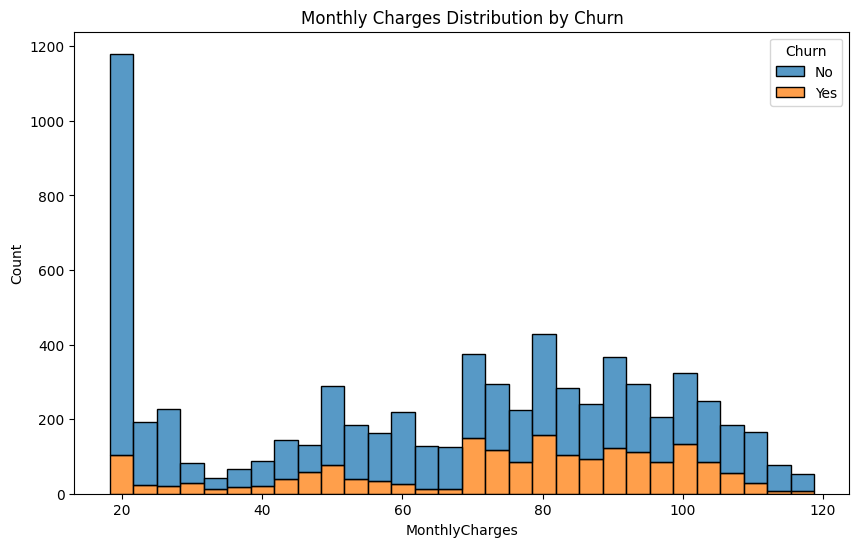

In [43]:
#Monthly Charges VS Churn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack", bins=30)
plt.title('Monthly Charges Distribution by Churn')
plt.show()


Here the observation can be see that higher monthly charges are correlated with churn

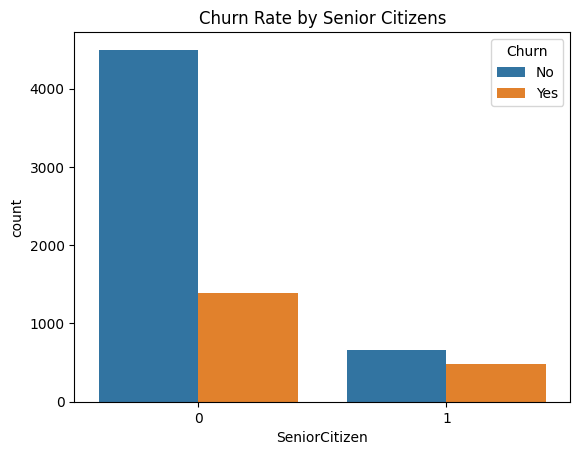

In [46]:
#Senior Citizen VS Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Rate by Senior Citizens')
plt.show()

Observation for senior catagory have a higher churn rate

Summary key:
Month-to-Month contracts have higher churn.

Customers with high Monthly Charges churn more.

New customers with short tenure churn quickly.

In [54]:
#Let's start with Data PreProcessing.
#Identify Categorical Columns

cnts_cols = df.select_dtypes(include= ['object']).columns
print(cnts_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [56]:
#Categorical Features
from sklearn.preprocessing import LabelEncoder

#We can use the below code for a backup.
df_model = df.copy()

#Let's drop the data which we don't need.
df_model.drop('customerID', axis=1, inplace = True)

#Use the Binary encoding.
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# One-Hot encoding for multi-class categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)

print("Shape after encoding:", df_model.shape)
df_model.head()

Shape after encoding: (7032, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


## So basically what we did was making the data more comfortable to read and understand for machine using the bool for example: Male/Female, YES/NO

In [59]:
#Focus on Feature Scaling.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_model[scaled_cols] = scaler.fit_transform(df_model[scaled_cols])

df_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False


In [61]:
#Well now the fun part of data analysis, Preparation of X and y (Feature and Target)

#We put Features as X
X = df_model.drop('Churn', axis = 1)

#And Target as y
y = df_model['Churn']


In [63]:
#Train- Test and SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (5274, 30)
Testing samples: (1758, 30)


In [65]:
#Now let's Train the Models

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:,1]

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758

ROC-AUC Score: 0.8403500100348816


## Random Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluate
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.63      0.49      0.55       467

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758

ROC-AUC Score: 0.819036253290363


In [73]:
#Using XGBoost as a Advanced MODEL.

## XGBoost 

In [76]:
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

# Evaluate
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


C:\Users\hride\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1291
           1       0.57      0.50      0.54       467

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.76      1758

ROC-AUC Score: 0.8135568762160036


In [78]:
#So as we have 3 models we can create a table using pandas

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.81, 0.79, 0.77],
    'Precision': [0.65, 0.63, 0.57],
    'Recall': [0.57, 0.49, 0.50],
    'F1-Score': [0.61, 0.55, 0.54],
    'ROC-AUC': [0.840, 0.819, 0.814]
})

# Display
comparison_df.style.highlight_max(color='lightgreen', axis=0)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.810000,0.650000,0.570000,0.610000,0.840000
1,Random Forest,0.790000,0.630000,0.490000,0.550000,0.819000
2,XGBoost,0.770000,0.570000,0.500000,0.540000,0.814000


In [84]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(lr_model, 'C:/Users/hride/OneDrive/Desktop/Active Projects/Customer Churn Prediction System/Models/logistic_regression_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [86]:
print(X_train.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
